## 타이타닉 생존자 예측

### 1. 데이터 로드

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 데이터 불러오기
titanic_df = pd.read_csv('./titanic_train.csv')
titanic_df.info()
titanic_df.isnull().sum() # NaN값 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 2. 데이터 확인 & Null 값 처리

In [8]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace = True)
titanic_df['Embarked'].fillna('N', inplace = True)
print('데이터 세트 Null 값 갯수 ',titanic_df.isnull().sum().sum())

데이터 세트 Null 값 갯수  0


In [9]:
print(' Sex 값 분포 :\n',titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포 :\n',titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포 :\n',titanic_df['Embarked'].value_counts())

 Sex 값 분포 :
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포 :
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포 :
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [11]:
# Cabin 컬럼 데이터 제일 앞 등급표시만 가져오도록
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [14]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

* 생존자의 남여 성비구성 확인

확인 결과 : 남성보다 여성이 더 생존능력이 뛰어나다 라고 분석을 하는건 너무 성급한 일반화의 오류

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

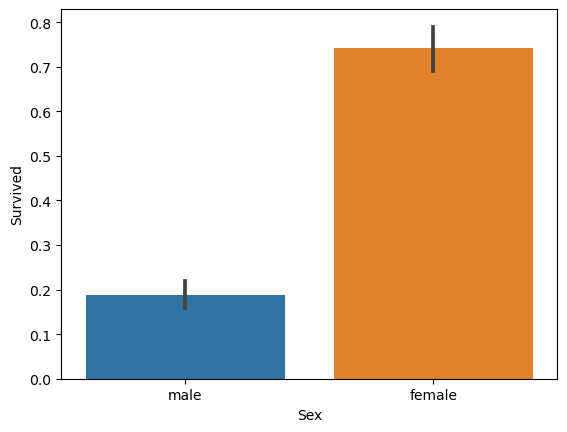

In [16]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()
sns.barplot(x='Sex', y = 'Survived', data=titanic_df)

* 성별과 객실 등급에 따른 생존 여부 비교

** 생존자수가 1이 넘지 않는 이유
   'sns.barplot()' 함수는 기본적으로 막대 그래프를 그릴 때 각 범주의 평균 값을 계산하여 표시.
   생존 여부(Survived) 열은 0과 1의 두 가지 값으로 구성되어 있으며, 이 값들은 사망(0)과 생존(1)을 나타냄. 따라서 평균 생존율은 0과 1 사이의 값으로 표현되며, 최대값은 1

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

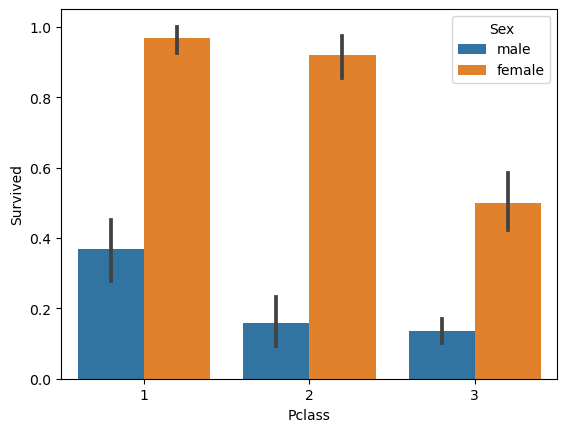

In [17]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

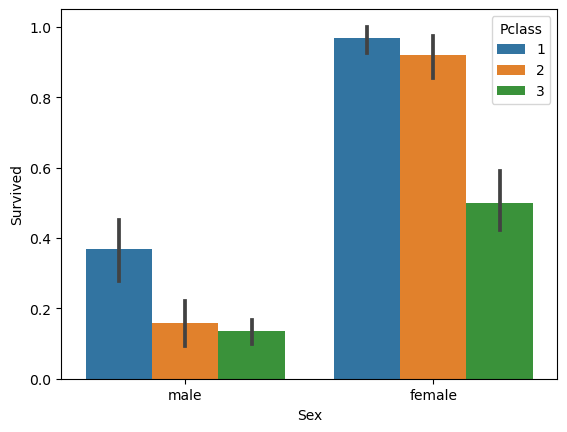

In [25]:
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=titanic_df)

* 나이별 생존 여부

In [31]:
def get_categroy(age):
    cat = ""
    if age <= -1: cat = "Unknown"
    elif age <= 5: cat = "Baby"
    elif age <= 12: cat = "Child"
    elif age <= 18: cat = "Teenager"
    elif age <= 25: cat = "Student"
    elif age <= 35: cat = "Young Adult"
    elif age <= 60: cat = "Adult"
    else : cat = "Elderly"
    return cat

#X축의 값을 순차적으로 표시하기 위한 설정
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda 식에 위에서 생성한 get_category( ) 함수를 반환값으로 지정. 
# get_category(X)는 입력값으로 'Age' 컬럼값을 받아서 해당하는 cat 반환
titanic_df["AgeGroup"] = titanic_df["Age"].apply(lambda x : get_categroy(x))
titanic_df["AgeGroup"].value_counts()

Young Adult    373
Adult          195
Student        162
Teenager        70
Baby            44
Child           25
Elderly         22
Name: AgeGroup, dtype: int64

<AxesSubplot:xlabel='AgeGroup', ylabel='Survived'>

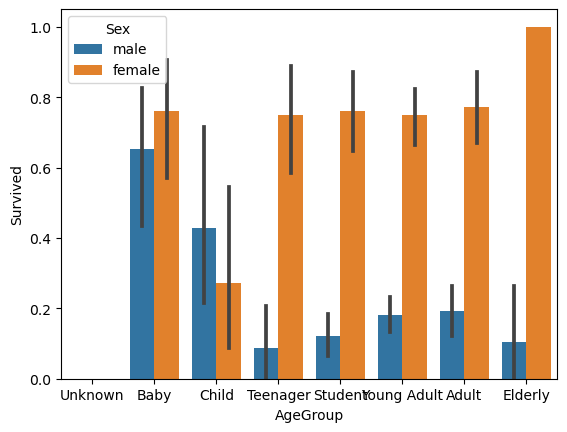

In [32]:
# 나이대 그룹과 성별에 따른 생존 여부
sns.barplot(x="AgeGroup", y="Survived", hue="Sex", data=titanic_df,  order=group_names)

* Parch(같이 탑승한 부모님 또는 어린이 인원수)와 SibSp(같이 탑승한 형제 또는 배우자 인원수)에 따른 생존 여부 비교

결과 : 다른 비교 그래프들에 비해 균등하므로 좋은 변수는 아님

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

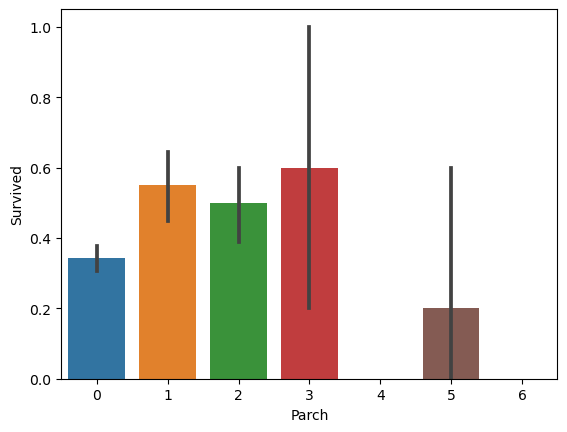

In [29]:
sns.barplot(x="Parch", y="Survived", data=titanic_df)

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

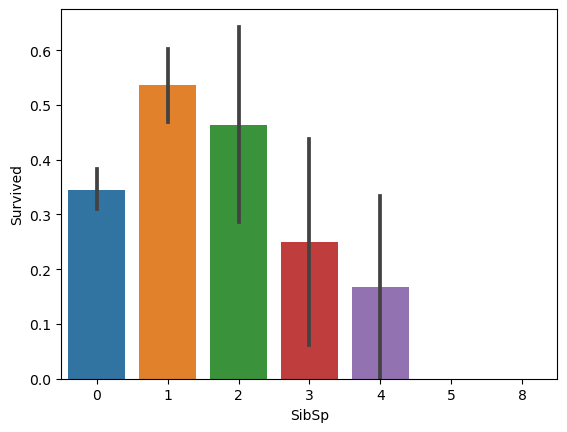

In [30]:
sns.barplot(x="SibSp", y="Survived", data=titanic_df)

In [33]:
# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

### 3. 인코딩

In [45]:
# 레이블 인코딩 수행.
# 'Cabin','Sex','Embarked'의 데이터 값을 숫자로 변환

from sklearn import preprocessing

def format_features(df):
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df


titanic_df = format_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,147,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,81,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,147,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,55,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,147,2


* 위에서 실행한 코드들을 함수로 설정함

In [46]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 앞에서 설정한 Data Preprocessing 함수 모두 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df


### 4. 원본 데이터를 재로딩 & feature데이터 셋과 Label 데이터 셋 분리

* 원본 데이터 재로딩

In [51]:
import pandas as pd

titanic_df = pd.read_csv('./titanic_train.csv')

y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived',axis=1)

X_titanic_df = transform_features(X_titanic_df) # 데이터 전처리 & 인코딩

X_titanic_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.000000,1,0,7.2500,146,3
1,1,0,38.000000,1,0,71.2833,81,0
2,3,0,26.000000,0,0,7.9250,146,3
3,1,0,35.000000,1,0,53.1000,55,3
4,3,1,35.000000,0,0,8.0500,146,3
...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,146,3
887,1,0,19.000000,0,0,30.0000,30,3
888,3,0,29.699118,1,2,23.4500,146,3
889,1,1,26.000000,0,0,30.0000,60,0


* feature데이터 셋과 Label 데이터 셋 분리

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, \
                                                  test_size=0.2, random_state=11)

### 생존자 예측 수행

* 결정트리, 랜덤 포레스트, 로지스틱 회귀를 이용

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

In [50]:
# DecisionTreeClassfier 학습/예측평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도 : {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도 : 0.7989
RandomForestClassifier 정확도 : 0.8436
LogisticRegression 정확도 : 0.8603


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


결과 : 3개의 알고리즘 중 LogisticRegression이 타 알고리즘에 비해 높은 정확도를 나타내고 있음. 그러나 아직 최적화 작업을 수행하지 않았고, 데이터 양도 충분하지 않기에 LogistiocRegression이 가장 좋은 모델이라고 할 수는 없음.

### 교차 검증 수행

* KFold

In [52]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds = 5) :
    # 폴드 세트가 5개인 KFold 객체 생성. 폴드 수만큼 예측결과 저장 위한 리스트 생성
    kfold = KFold(n_splits = folds)
    scores = []
    
    # KFold 교차 검증 수행
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)) :
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index] # values를 통해 df를 ndarray로 변환
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        # Classifier 학습/예측/평가
        clf.fit(X_train, y_train)
        clf_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, clf_pred)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도 : {1:.4f}".format(iter_count, accuracy))
        
    # 5개의 fold에서 평균 정확도 계산
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score))

#exec_fold 호출
exec_kfold(dt_clf, folds = 5)

교차 검증 0 정확도 : 0.7486
교차 검증 1 정확도 : 0.7640
교차 검증 2 정확도 : 0.8202
교차 검증 3 정확도 : 0.7809
교차 검증 4 정확도 : 0.7921
평균 정확도: 0.7812


* cross_val_score( ) 

In [53]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv = 5)
print("scores : ", scores)
for iter_count, accuracy in enumerate(scores) :
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))
    
print("평균 정확도: {0:.4f}".format(np.mean(scores)))

scores :  [0.74860335 0.7752809  0.80898876 0.75842697 0.80337079]
교차 검증 0 정확도: 0.7486
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.8090
교차 검증 3 정확도: 0.7584
교차 검증 4 정확도: 0.8034
평균 정확도: 0.7789


* GridSearchCV

In [54]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2, 3, 5, 10],
             'min_samples_split':[2, 3, 5],
             'min_samples_leaf':[1, 5, 8]}
grid_dclf = GridSearchCV(dt_clf, param_grid = parameters, scoring = 'accuracy', cv = 5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터 : ', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

#GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 :  {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
GridSearchCV 최고 정확도: 0.7993
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8659
